**Task 1**

**Name : Parth Bhatia**

**The Sparks Foundation**

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Data.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Summary of Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df['Scores']

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

**Exploratory Data Analysis**

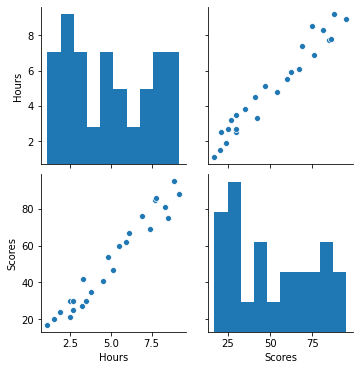

In [11]:
sns.pairplot(df)

In [12]:
df.corr()
# As we can see there is a very strong correlation 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

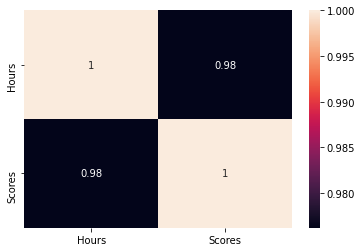

In [13]:
#visualizing using seaborn
sns.heatmap(df.corr(),annot=True)

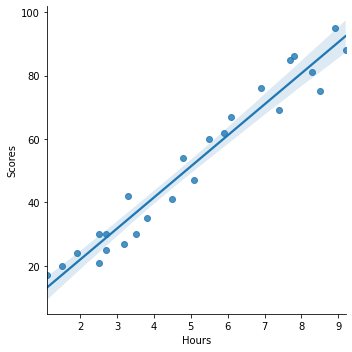

In [14]:
#Now we can create a lmplot to see the line of best fit
sns.lmplot('Hours','Scores',df)

**Creating and Splitting Data Set**

In [40]:
#This is important for training linear regression you will need a 2D array
X=df[['Hours']]

In [29]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [28]:
y=df['Scores']

In [18]:
from sklearn.model_selection import train_test_split

In [30]:
#random state is used for specific splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [31]:
X_train

,Hours
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9
21,4.8


**Training the Model**

In [22]:
from sklearn.linear_model import LinearRegression

In [32]:
#instantiating an object 
lr=LinearRegression()

In [33]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3
1,5.1


In [34]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#Now we can check the coefficients and the intercepts as 
lr.coef_


array([9.71054094])

In [39]:
lr.intercept_

2.794196676599803

In [41]:
#We have trained the model now we can predict using the test data 
y_predict=lr.predict(X_test)

In [42]:
y_predict

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

[Text(0.5, 0, 'Y Test'), Text(0, 0.5, 'Y Predicted')]

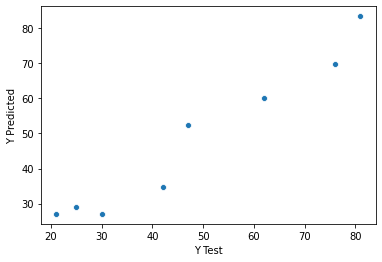

In [43]:
# You can use scatter plot to see the correlation between actual and predicted value
b=sns.scatterplot(y_test,y_predict)
b.set(xlabel='Y Test',ylabel='Y Predicted')

**Evaluating the Model**

In [44]:
#Evaluating the model
from sklearn import metrics

In [45]:
#you can use these 3 common metrics for evaluating linear regression
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 4.499999999999998
MSE: 23.61945761415174
RMSE: 4.859985351228103


In [48]:
# Now using this model we can predict scores if we provide hours as input
test_data= [[9.25]]
test_result=lr.predict(test_data)

In [51]:
print('Predicted scores of a student studying 9.25 hrs/day is',test_result[0])

Predicted scores of a student studying 9.25 hrs/day is 92.61670033840096
